# L09-BayesOpEd

## Author - Rodolfo Lerma

# Problem

Can we predict if the house price will fall into one of the 3 categories (low, medium & high price) with the information that is available?

# Abstract:

In this analysis it will be explored the houses' prices at King County in WA

The analysis is is divided the following way:

### First look at the data:
- **Loading Data**
- **Data Cleaning**:
    - `Price` Distribution
    - `Price` Time Distribution

### Analysis:
- **Summary from previous analysis/milestones**
    - Notes on the variables used on this analysis
- **Reducing Features**
- **Train and Test the Model**
- **Evaluate Model Performance**


### Summary/conclusions:

# First look at the data:

## Loading Data

In [1]:
#Loading libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load File
filename = 'kc_house_data.csv'
house_df = pd.read_csv(filename)

In [3]:
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data cleaning:

**Since in previous analysis (Milestone 1) it was already presented the *first look to the data* an some reasoning on why the data was filtered in certain way, in this section of the analysis it would be assumed as already covered and understood.**

In [5]:
#Removing outliers based on Price:
LimitHi = np.mean(house_df['price']) + 1*np.std(house_df['price']) #Higher Limit for each of the numeric attributes
LimitLo = np.mean(house_df['price']) - 1*np.std(house_df['price']) #Lower Limit for each of the numeric attributes
FlagBad = (house_df['price'] < LimitLo) | (house_df['price'] > LimitHi) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood]

#Some cleaning of the data (outliers) will be removed since we are interested in the typical market for the region.
FlagBad = (house_df['bedrooms'] > 8) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

FlagBad = (house_df['bathrooms'] > 6) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

FlagBad = (house_df['sqft_lot'] > 50000) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

house_df = house_df.dropna()

#Transforming the variable date into DateTime Variable
house_df.loc[:, 'date'] = pd.to_datetime(house_df.loc[:, 'date'])

#Column price from str to numeric (int64)
house_df['price'] = pd.to_numeric(house_df['price'])

### `Price` Distribution

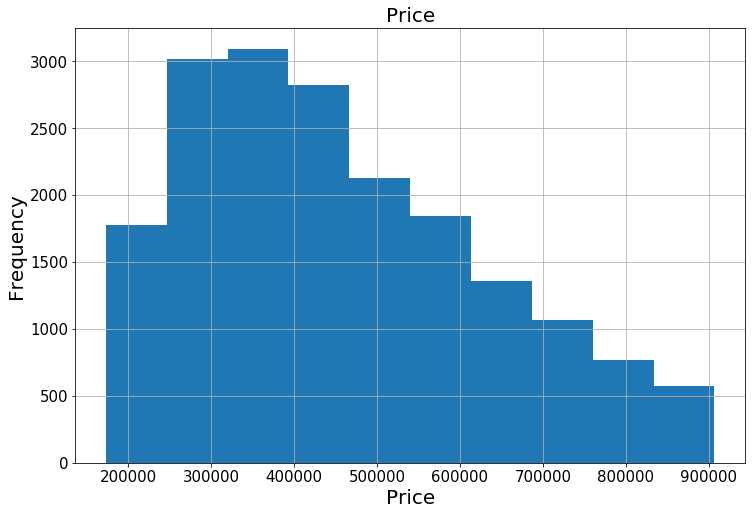

In [6]:
house_df['price'].hist(figsize = (12,8))
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Price', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

As it can be seen the avg `price` of a house in this sample is around ~$380,000 (after outliers were removed).

In [7]:
house_df2 = house_df.copy()
house_df2.index = house_df2['date']

In [8]:
house_df.shape

(18459, 21)

After outliers where removed the dataframes ended up containing 18,459 rows.

### `Price` Time Distribution

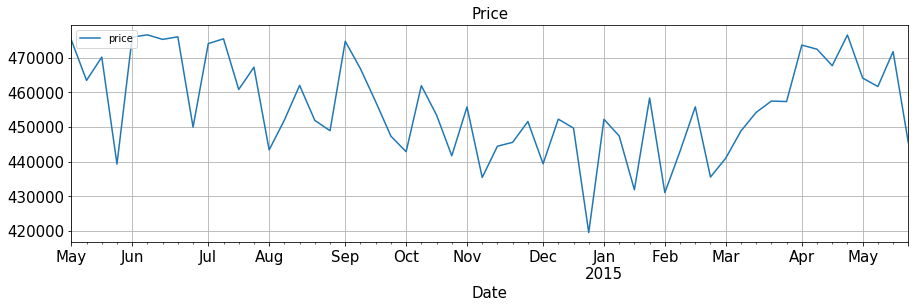

In [9]:
#Time series plot for Price
#To minimize the noise each data point seen here is the mean of a 2 Weeks sample
house_df2[["price"]].resample("1W").mean().plot(figsize=(15,4))
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('Date', fontsize = 15)
plt.title('Price',fontsize=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

As it was seen in previous analysis the data available was for 1 year between 2013 and 2014. It is possible to see that there is a small change between the first months of the year and mid year. During the first months of the year we see a lower `price` compared to mid year. This difference is for around 25,000 dollars. This was explored with more details in Milestone 03.

# Analysis

For this analysis and for simplification reasons the `price` variable will be binned into 2 categories: 0 & 1 (accessible and expensive).

## Summary from previous analysis/milestones

In the previous analysis (Milestone 01) it was shown that some of the variables (attributes) in the data set do not add value to predict the `price` of a house. For tha reason those columns were removed from this analysis and are not going to be covered in here.

The variables that will be explore are:

- `price`
- `sqft_living`
- `bedrooms`
- `bathrooms`
- `floors`
- `view`
- `condition`
- `grade`

For simplicity in this analysis categorical variables or variables were values are discrete will be binned into either 2 or 3 bins as needed.

## Reducing Features
We can see some features which are likely to be collinear. The code in the cell below removes these columns. Execute this code to create a data set with reduced features.

In [10]:
categorical = ['bedrooms','bathrooms','sqft_living','condition','grade']
#first we need to ensure the variables are numeric
for i in categorical:
    house_df.loc[:, i] = house_df[i].astype(int)

### Binning Variables

In [11]:
#Creating bin variables to split the distribution
house_df['condition_binned'] = pd.cut(x=house_df['condition'], bins=[0,3,6], labels = [0, 1])
house_df['grade_binned'] = pd.cut(x=house_df['grade'], bins=[0,6,13], labels = [0, 1])
house_df['bedrooms_binned'] = pd.cut(x=house_df['bedrooms'], bins=[0,3,9], labels = [0, 1])
house_df['bathrooms_binned'] = pd.cut(x=house_df['bathrooms'], bins=[0,2,4,8], labels = [0, 1, 2])
house_df['sqft_living_binned'] = pd.cut(x=house_df['sqft_living'], bins=[0,1500,2500,8000], labels = [0, 1, 2])
house_df['lat_binned'] = pd.cut(x=house_df['lat'], bins=[40,47.5,50], labels = [0, 1])
house_df['floors_binned'] = pd.cut(x=house_df['floors'], bins=[0,2,3,4], labels = [0, 1, 2])
#house_df['price_binned'] = pd.cut(x=house_df['price'], bins=[0,350000,600000,1000000], labels = [0, 1, 2])
house_df['price_binned'] = pd.cut(x=house_df['price'], bins=[0,400000,1000000], labels = [0, 1])

In [12]:
house_df = house_df.dropna()

In [13]:
house_df = house_df.drop(['floors','condition_binned','grade_binned','bedrooms_binned','bathrooms','sqft_living','price','id','date', 'sqft_lot', 'waterfront', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','sqft_above'], axis=1)

In [14]:
label_col = 'price_binned'

labels = house_df[label_col].cat.codes
    
features = []
for c in house_df.columns:
    if c != label_col:
        if str(house_df[c].dtype) == 'category':
            features.append(house_df[c].cat.codes)
        else:
            features.append(house_df[c])

In [15]:
house_df.loc[:, i] = house_df[i].astype(int)

#### Data Types for the Variables used in this analysis

In [16]:
house_df.dtypes

bedrooms                 int32
view                     int64
condition                int32
grade                    int32
bathrooms_binned      category
sqft_living_binned    category
lat_binned            category
floors_binned         category
price_binned          category
dtype: object

In [17]:
feature_vecs = np.array(features).T

In [18]:
feature_vecs

array([[3, 0, 3, ..., 0, 1, 0],
       [3, 0, 3, ..., 2, 1, 0],
       [2, 0, 3, ..., 0, 1, 0],
       ...,
       [3, 0, 3, ..., 1, 1, 1],
       [4, 0, 3, ..., 1, 1, 0],
       [3, 0, 3, ..., 1, 1, 0]], dtype=int64)

## Train and Test the Model

In [19]:
import sklearn.metrics
import sklearn.naive_bayes

In [20]:
# Create the Model
model = sklearn.naive_bayes.MultinomialNB(alpha=3) #the result in the model will be the same as using 1e-7, but 3 is easier to type

In [21]:
model.fit(feature_vecs, labels)

MultinomialNB(alpha=3)

In [22]:
conditional_probas = pd.DataFrame(model.feature_log_prob_, columns=house_df.columns[:-1])
conditional_probas

,bedrooms,view,condition,grade,bathrooms_binned,sqft_living_binned,lat_binned,floors_binned
0,-1.538508,-5.651429,-1.464781,-0.736488,-6.152087,-3.222087,-3.565523,-6.448889
1,-1.599772,-4.363193,-1.610518,-0.781203,-4.988821,-2.724709,-2.943768,-5.938955


In [23]:
x = -conditional_probas

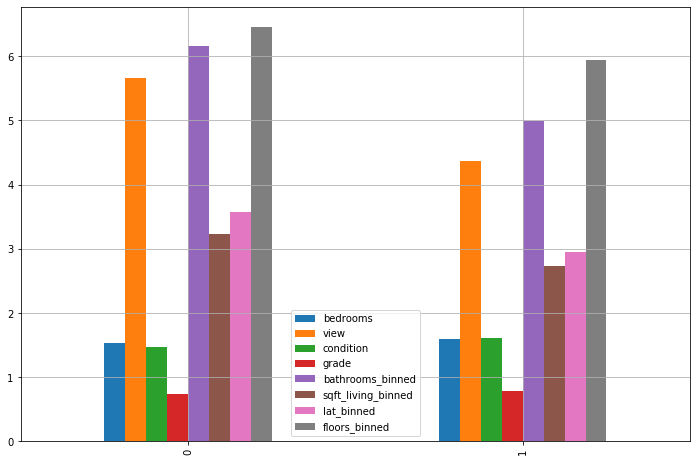

In [24]:
x.plot(kind= 'bar',figsize = (12,8), grid = (True))

From here it is possible to see that some parameters do not contribute much (this will be explored in the next analysis), and the one that contribute the least is `grade` while the one that contributes the most is `bathrooms` & `floors` follow by `view`, `latitude` & `sqft_living`.

## Evaluate Model Performance

In [25]:
predicted_price = model.predict(feature_vecs)
price_probabilities = model.predict_proba(feature_vecs)

In [26]:
accuracy = sklearn.metrics.accuracy_score(labels, predicted_price)

In [27]:
precision = sklearn.metrics.precision_score(labels, predicted_price, average = 'macro')

In [28]:
recall = sklearn.metrics.recall_score(labels, predicted_price, average='macro')

In [29]:
print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
print('Confusion matrix:')

Accuracy = 0.781, Precision = 0.780, Recall = 0.776
Confusion matrix:


From here we can see that potentially there is room for improvement (which will be explored in the next milestone).

In [30]:
import sklearn.metrics

def confusion_matrix(labels, predicted_labels, label_classes):
    return pd.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)    

In [31]:
confusion_matrix(labels, predicted_price, 
                 house_df[label_col].cat.categories)

,0,1
0,5978,2244
1,1783,8388


In [33]:
predicted_price = model.predict(feature_vecs[:20000])
price_probabilities = model.predict_proba(feature_vecs[:20000])

results = pd.DataFrame({
        'price_binned': house_df['price_binned'][:20000],
        'predicted': pd.Categorical.from_codes(
            predicted_price, house_df['price_binned'][:10].cat.categories),
        'proba(Accessible)': price_probabilities[:, 0],
        'proba(Expensive)': price_probabilities[:, 1],
    })
results.head(10)

,price_binned,predicted,proba(Accessible),proba(Expensive)
0,0,0,0.524860,0.475140
1,1,1,0.290031,0.709969
2,0,1,0.498386,0.501614
3,1,1,0.229987,0.770013
4,1,1,0.412621,0.587379
6,0,0,0.555742,0.444258
7,0,0,0.672889,0.327111
8,0,1,0.401828,0.598172
9,0,0,0.555742,0.444258
10,1,1,0.299324,0.700676


In [34]:
def performance(results):
    accuracy = sklearn.metrics.accuracy_score(
        results['price_binned'].cat.codes, results['predicted'].cat.codes)
    precision = sklearn.metrics.precision_score(
            results['price_binned'].cat.codes, results['predicted'].cat.codes,average='macro')
    recall = sklearn.metrics.recall_score(
            results['price_binned'].cat.codes, results['predicted'].cat.codes,average='macro')

    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
    
    return confusion_matrix(
        results['price_binned'], 
        results['predicted'], 
        results.price_binned.cat.categories)

In [35]:
performance(results)

Accuracy = 0.781, Precision = 0.780, Recall = 0.776


,0,1
0,5978,2244
1,1783,8388


# Conclusions/Summary:

Quick re-cap of the analysis above:

- The `price` variable was binned into 2 categories: 0 (Accessible) and 1 (Expensive).
- Outliers were identified and later on removed in some variables `price` & `sqft_living` (with no significant impact in the analysis).
- Some numerical variables where transform into categorical by means of binning.
- The variables used for this Model where:
    - `bedrooms`                
    - `view`                     
    - `condition`                
    - `grade`                    
    - `bathrooms_binned`      
    - `sqft_living_binned`    
    - `lat_binned`            
    - `floors_binned`  


Regarding the predictions:

- It is possible to see that the contribution of some of the variables included in this analysis is not very significant, specially the variable `grade`. Which will be potentially removed from posterior analysis.

- From the prediction we can see that the model does a fairly good job, but there is still room for improvement, such as exploring the value of including the date (months as a categorical variable) and this will be explored in the next section of the analysis.

- Another thing to notice is that the entire data set was used to train this model. Next time the data set will be split into train and test data, in this way exploring the actual capability and scalability of the model will be analyzed.

- No direct comparison can be done between the previous model and this one, as one was a Time Series Model using a Regression Model to predict the `price`, and this one is a Naive Bayes Model with a binomial output (accessible or expensive). 